# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy import stats
from datetime import datetime as dt
from scipy.stats import linregress

In [1]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

output_data_file
pd.read_csv('../output_data/cities.csv')

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
counter = 0

print("Beginning Data Retrieval")
print("------------------------")

# 1st set of 50 
for x in range(len(cities)):
    print(f"Record {x} in 1st set | {cities[x]}")
    counter += 1
    if counter == 50:
        break

# 2nd set of 50    
counter = 0 

for x in range(len(cities)):
    print(f"Record {x} in 2nd set | {cities[x + 50]}")
    counter += 1
    if counter == 50:
        break
        
# 3rd set of 50     
counter = 0    
for x in range(len(cities)):
    print(f"Record {x} in 3rd set | {cities[x + 100]}")
    counter += 1
    if counter == 50:
        break
        
# 4th set of 50        
counter = 0      
for x in range(len(cities)):
    print(f"Record {x} in 4th set | {cities[x + 150]}")
    counter += 1
    if counter == 50:
        break
        
# 5th set of 50         
counter = 0      
for x in range(len(cities)):
    print(f"Record {x} in 5th set | {cities[x + 200]}")
    counter += 1
    if counter == 50:
        break

print("------------------------")       
print("Data Retrieval Complete")
print("------------------------")


Beginning Data Retrieval
------------------------
Record 0 in 1st set | ribeira grande
Record 1 in 1st set | taolanaro
Record 2 in 1st set | wattegama
Record 3 in 1st set | salinas
Record 4 in 1st set | warqla
Record 5 in 1st set | dikson
Record 6 in 1st set | airai
Record 7 in 1st set | ilulissat
Record 8 in 1st set | vila franca do campo
Record 9 in 1st set | vestmannaeyjar
Record 10 in 1st set | punta arenas
Record 11 in 1st set | buchanan
Record 12 in 1st set | avera
Record 13 in 1st set | kodiak
Record 14 in 1st set | vaini
Record 15 in 1st set | tsihombe
Record 16 in 1st set | blind river
Record 17 in 1st set | amazar
Record 18 in 1st set | pangkalanbuun
Record 19 in 1st set | souillac
Record 20 in 1st set | tasiilaq
Record 21 in 1st set | ponta do sol
Record 22 in 1st set | port blair
Record 23 in 1st set | rikitea
Record 24 in 1st set | palmer
Record 25 in 1st set | saint-philippe
Record 26 in 1st set | sola
Record 27 in 1st set | mys shmidta
Record 28 in 1st set | bredasdorp
R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Configuring my api weather key
url = "https://api.openweathermap.org/data/2.5/weather?"

# Using imperial to get faherenheit
units = "imperial"

# And f string my url and api together
query = f"{url}&appid={weather_api_key}&q="
# print(query)    

In [6]:
#Creating an empty list to store procossing log
cityname = []
cloudiness = []
country =[]
date =[]
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

for city in cities:
    response = requests.get(query + city + "&units=" + units)
    response_json = response.json()
    json.dumps(response_json, indent=4, sort_keys=True)
#     print(json.dumps(response_json, indent=4, sort_keys=True))
    try:
        # Appending data to lists
        cityname.append(response_json['name'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        maxtemp.append(response_json['main']['temp_max'])
        windspeed.append(response_json['wind']['speed'])
    except:
#         print("City not found")
        pass



In [8]:
# put csv into dataframe
cities_df = pd.DataFrame({"City": cityname, 
              "Cloudiness": cloudiness, 
              "Country": country, 
              "Date": date, 
              "Humidity": humidity, 
              "Latitude": lat, 
              "Longitude": lng, 
              "Max Temp": maxtemp, 
              "Wind Speed": windspeed
                           })

cities_df.count()

In [125]:
cities_df.to_csv('../output_data/cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [73]:
## CONVERT THE DATE INTO MM/DD/YYYY
date_time = pd.to_datetime('today').date()
date_time
nowdate = [date_time]
nowdate

[datetime.date(2020, 3, 22)]

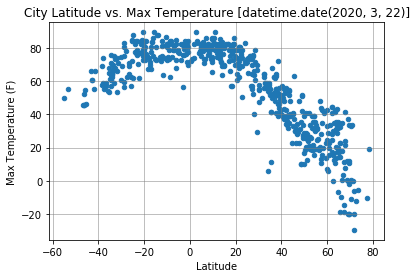

In [82]:
#City Latitude vs. Max Temp

maxtemp = cities_df.plot.scatter(x='Latitude',
                      y='Max Temp')
plt.grid(which='major',axis='both', color='gray', linestyle='-', linewidth=.5)
plt.title(f"City Latitude vs. Max Temperature {nowdate}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.savefig("maxtemp.png")
plt.show();

#### Latitude vs. Humidity Plot

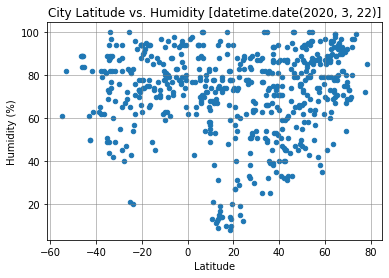

In [83]:
#City Latitude vs. Humidity
humidity = cities_df.plot.scatter(x='Latitude',
                      y='Humidity')
plt.grid(which='major',axis='both', color='gray', linestyle='-', linewidth=.5)
plt.title(f"City Latitude vs. Humidity {nowdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("humidity.png")
plt.show();

#### Latitude vs. Cloudiness Plot

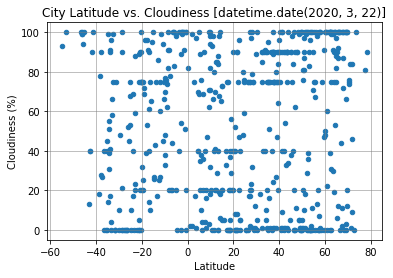

In [84]:
#City Latitude vs. Cloudiness
cloudiness = cities_df.plot.scatter(x='Latitude',
                      y='Cloudiness')
plt.grid(which='major',axis='both', color='gray', linestyle='-', linewidth=.5)
plt.title(f"City Latitude vs. Cloudiness {nowdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("cloudiness.png")
plt.show();

#### Latitude vs. Wind Speed Plot

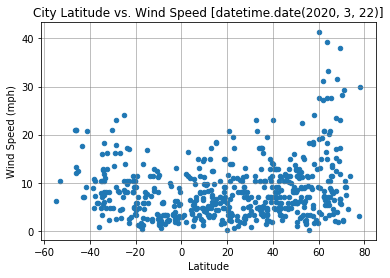

In [85]:
#City Latitude vs. Wind Speed
windspeed = cities_df.plot.scatter(x='Latitude',
                      y='Wind Speed')
plt.grid(which='major',axis='both', color='gray', linestyle='-', linewidth=.5)
plt.title(f"City Latitude vs. Wind Speed {nowdate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("windspeed.png")
plt.show();

## Linear Regression

In [90]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities_df.loc[cities_df['Latitude'] > 0,:]
southern = cities_df.loc[cities_df['Latitude'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8991816731790028


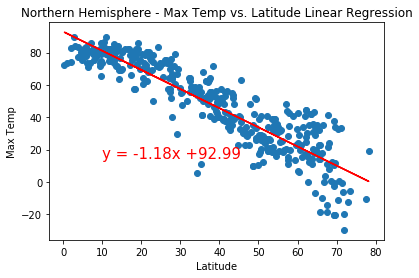

In [104]:
x_values = northern['Latitude']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6686131646678063


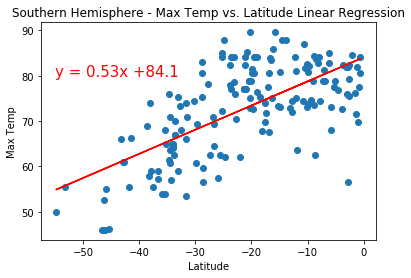

In [108]:
x_values = southern['Latitude']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28631329939642586


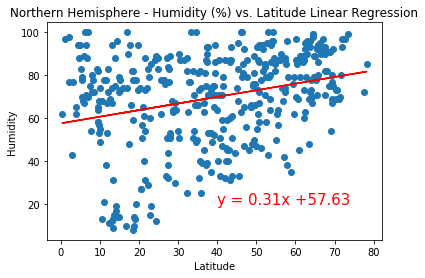

In [111]:
x_values = northern['Latitude']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18639875823351226


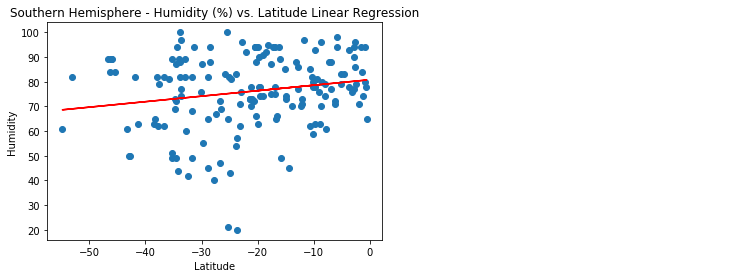

In [113]:
x_values = southern['Latitude']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17845422581231585


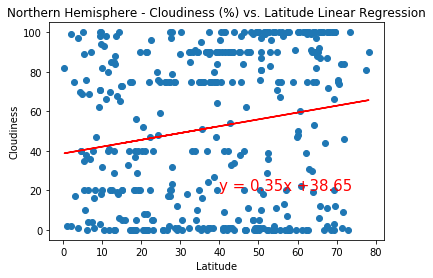

In [114]:
x_values = northern['Latitude']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12475088934249544


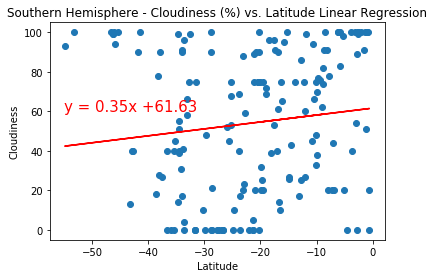

In [117]:
x_values = southern['Latitude']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.28410790717848217


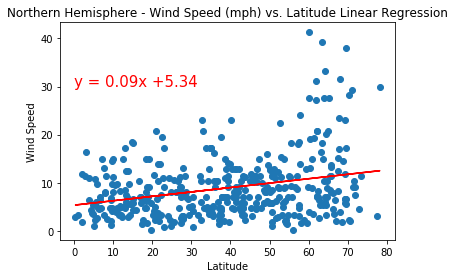

In [119]:
x_values = northern['Latitude']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,30),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4529915015264765


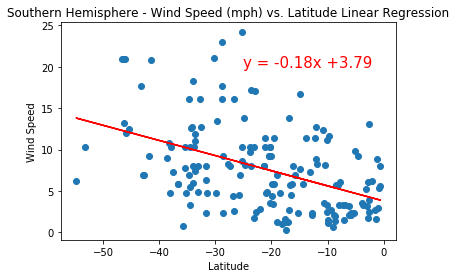

In [122]:
x_values = southern['Latitude']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
# print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()